In [4]:
import numpy as np
import pandas as pd
import os, sys, datetime
######### Pysaprk
from pyspark import SparkContext
from pyspark.sql import SparkSession
#!pip install neattext
import neattext.functions as nfx
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


In [5]:
sc=SparkContext(master='local[2]')
print(sc)

23/08/22 10:03:11 WARN Utils: Your hostname, SailhOsman resolves to a loopback address: 127.0.1.1; using 172.22.57.122 instead (on interface eth0)
23/08/22 10:03:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/22 10:03:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/08/22 10:03:14 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/08/22 10:03:14 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


<SparkContext master=local[2] appName=pyspark-shell>


In [6]:
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [7]:
spark=SparkSession.builder.appName("Text Mining").getOrCreate()
print(spark)

In [8]:
df=pd.read_csv("udemy_courses.csv" )
print(df.head())

   course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792        

In [9]:
df.shape
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [10]:
df2=df[['course_title', 'subject']]
df2.shape
print(df2.head())

                                        course_title           subject
0                 Ultimate Investment Banking Course  Business Finance
1  Complete GST Course & Certification - Grow You...  Business Finance
2  Financial Modeling for Business Analysts and C...  Business Finance
3  Beginner to Pro - Financial Analysis in Excel ...  Business Finance
4       How To Maximize Your Profits Trading Options  Business Finance


In [11]:
## Text pre-processing- Remove noise- lower case, remove punct, remove stopwords
########## normalize, then Lammatize and Stemming @@@@@@@@@@@@@@@@@@@@@
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [12]:
df['course_title_clean']=df['course_title'].apply(nfx.remove_stopwords)
df['course_title_clean']=df['course_title_clean'].apply(nfx.remove_special_characters)
df['course_title_clean']=df['course_title_clean'].str.lower()


In [13]:
print(df['course_title'].head(), df['course_title_clean'].head())

0                   Ultimate Investment Banking Course
1    Complete GST Course & Certification - Grow You...
2    Financial Modeling for Business Analysts and C...
3    Beginner to Pro - Financial Analysis in Excel ...
4         How To Maximize Your Profits Trading Options
Name: course_title, dtype: object 0                   ultimate investment banking course
1    complete gst course  certification  grow practice
2     financial modeling business analysts consultants
3          beginner pro  financial analysis excel 2017
4                     maximize profits trading options
Name: course_title_clean, dtype: object


In [14]:
### convert word to vectors
## tfidf
## Counts
## HashVec

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
xfeatures = df['course_title_clean']
ylabel = df['subject']
print(xfeatures.head(),ylabel.head())

0                   ultimate investment banking course
1    complete gst course  certification  grow practice
2     financial modeling business analysts consultants
3          beginner pro  financial analysis excel 2017
4                     maximize profits trading options
Name: course_title_clean, dtype: object 0    Business Finance
1    Business Finance
2    Business Finance
3    Business Finance
4    Business Finance
Name: subject, dtype: object


In [16]:
tfidf_vec= TfidfVectorizer()
X= tfidf_vec.fit_transform(xfeatures)
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
print(X)

  (0, 791)	0.33271496133381573
  (0, 355)	0.595449455256723
  (0, 1755)	0.5405136879533768
  (0, 3312)	0.492529850744246
  (1, 2471)	0.45191863761959283
  (1, 1492)	0.47015026234232893
  (1, 585)	0.4377770908343263
  (1, 1499)	0.514077918890026
  (1, 708)	0.2518462228271275
  (1, 791)	0.23532290132822398
  (2, 749)	0.5935673817884735
  (2, 210)	0.5170050534970209
  (2, 515)	0.3478151951940593
  (2, 2133)	0.4148159725947916
  (2, 1293)	0.2955263724402185
  (3, 46)	0.4435520884155543
  (3, 1196)	0.476414116325187
  (3, 208)	0.38834472378420776
  (3, 2517)	0.4278161835552039
  (3, 392)	0.3526049592611984
  (3, 1293)	0.3436896360525402
  (4, 2288)	0.3834782050597191
  (4, 3242)	0.288387841649422
  (4, 2542)	0.5397106396753576
  (4, 2056)	0.6917292421563369
  :	:
  (3673, 1927)	0.610764105680868
  (3673, 1805)	0.42259165894604106
  (3673, 1785)	0.34533884354744004
  (3673, 2822)	0.3609399716126845
  (3673, 2039)	0.375877649510487
  (3673, 1880)	0.23992271595058562
  (3674, 3504)	0.469506590

In [18]:
X.todense()
print(tfidf_vec)
####### Don't use get_feature_names use get_feature_names
vec_df= pd.DataFrame(X.todense(), columns=tfidf_vec.get_feature_names_out())  
print(vec_df)

TfidfVectorizer()
      000005  001   01   02   10  100  101  101master  102  10k  ...  zend  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
...      ...  ...  ...  ...  ...  ...  ...        ...  ...  ...  ...   ...   
3673     0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
3674     0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
3675     0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
3676     0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   
3677     0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0  0.0  ...   0.0   

      zero  zerotohero  zf2  zinsen  zoho  zo

In [19]:
import sklearn 
###### Transpose it
vec_df.T
#sklearn.__version__

,0,1,2,3,4,5,6,7,8,9,...,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677
000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuhause,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
####### Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, ylabel, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2574, 3559) (1104, 3559) (2574,) (1104,)


In [21]:
print(x_train, x_test)
print(X, ylabel )

  (0, 1247)	0.7174300624986424
  (0, 929)	0.3329631319662236
  (0, 2020)	0.6119065763451454
  (1, 699)	0.6658956341747252
  (1, 3029)	0.5099278294970162
  (1, 208)	0.4078009245892789
  (1, 1293)	0.3609086019972811
  (2, 1060)	0.48757486059893923
  (2, 946)	0.3968654127687806
  (2, 79)	0.5925674805897583
  (2, 3454)	0.2897590881656069
  (2, 708)	0.3009720623350433
  (2, 791)	0.2812256548157073
  (3, 1164)	0.4377456972176608
  (3, 879)	0.49454582987141166
  (3, 3240)	0.5470573715397449
  (3, 3037)	0.4186667347944475
  (3, 3242)	0.29874658850738733
  (4, 3264)	0.844802925445317
  (4, 3242)	0.3698104610349222
  (4, 791)	0.38671467526869563
  (5, 1948)	0.4518354197443498
  (5, 2027)	0.4918640967115673
  (5, 382)	0.4518354197443498
  (5, 1204)	0.3883914677978294
  :	:
  (2567, 1880)	0.19702446650509559
  (2568, 1196)	1.0
  (2569, 1367)	0.40994468798401185
  (2569, 1591)	0.4038963324165059
  (2569, 6)	0.3687872068781568
  (2569, 369)	0.37228728156946156
  (2569, 2288)	0.6278624701945599
  (25

In [22]:
#### model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
lr_model= LogisticRegression()
lr_fit= lr_model.fit(x_train, y_train)

In [23]:
lr_fit.score(x_test, y_test)

0.9402173913043478

In [24]:
#!pip install --upgrade scikit-learn
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

In [25]:
y_pred= lr_fit.predict(x_test)
y_pred
cm= confusion_matrix(y_pred,y_test, labels=lr_fit.classes_)
print(cm)

[[383  18  19  10]
 [  1 139   0   1]
 [  0   1 167   0]
 [  2  10   4 349]]


In [26]:
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.99      0.89      0.94       430
     Graphic Design       0.83      0.99      0.90       141
Musical Instruments       0.88      0.99      0.93       168
    Web Development       0.97      0.96      0.96       365

           accuracy                           0.94      1104
          macro avg       0.92      0.96      0.93      1104
       weighted avg       0.95      0.94      0.94      1104



In [30]:
ConfusionMatrixDisplay(confusion_matrix, display_labels=None)

In [31]:
lab=ylabel.unique()
print(lab)
len(lab)

['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


4

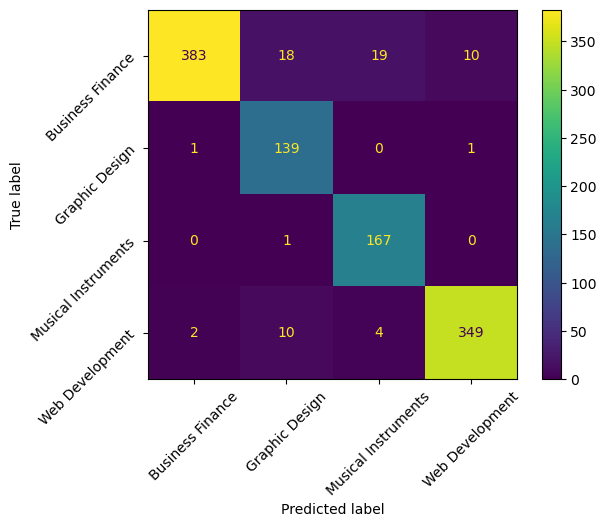

In [32]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_fit.classes_)
# , xticks_rotation=40
disp.plot()
tick_marks = np.arange(len(lab))
plt.xticks(tick_marks, rotation=45)
plt.yticks(tick_marks, rotation=45)
plt.show()

In [70]:
text ="Will be playing my musical instruments"
def vect_test(text):
    vec_app=tfidf_vec.transform([text])
    return vec_app.toarray()
vect_test(text)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [71]:
vect_test(text)
sample1= vect_test(text)

In [72]:
pred1= lr_fit.predict(sample1)
pred1
pred2= lr_fit.predict_proba(sample1)
print(pred1)
print(pred2)

['Musical Instruments']
[[0.32149054 0.15017373 0.34498102 0.18335471]]


In [76]:
lr_fit.classes_

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [78]:
### model intrepretation /explanation @@@@@@@@@@@@
### ELI5, LIME, and Shapley values Methods @@@@@@@@@@@@@@@
!pip install eli5
import eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.3 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=6486c0fed95087cbbc53b32296c21a4631e54396986db3a1a3157620b16c610b
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/metaestimators.py)